<a href="https://colab.research.google.com/github/tottenjordan/deep-learning/blob/master/sentiment-stock-analysis/TSLA_Stock_News_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import pandas_datareader
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas_datareader.data as pdr
from datetime import datetime
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


## Tesla Ticker Data

In [0]:
start = datetime(2014, 1, 3)
end = datetime(2019, 3, 13)
data = pdr.DataReader(name='TSLA', data_source='iex', start=start, end=end)
#data.head(5)

,open,high,low,close,volume
date,,,,,
2014-03-17,234.95,237.93,230.50,233.98,5912592
2014-03-18,236.95,241.50,235.02,240.04,6242349
2014-03-19,241.39,241.55,233.51,235.84,5071327
2014-03-20,236.16,239.25,233.36,234.91,3817905
2014-03-21,236.02,236.20,227.50,228.89,8227311


In [0]:
data = data.reset_index()
#data.head()

,date,open,high,low,close,volume
0,2014-03-17,234.95,237.93,230.50,233.98,5912592
1,2014-03-18,236.95,241.50,235.02,240.04,6242349
2,2014-03-19,241.39,241.55,233.51,235.84,5071327
3,2014-03-20,236.16,239.25,233.36,234.91,3817905
4,2014-03-21,236.02,236.20,227.50,228.89,8227311


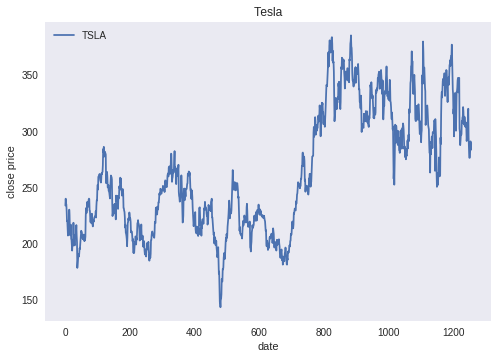

In [0]:
import matplotlib.pyplot as plt
symbol='TSLA'
# select only close column
close = data[['close']]
# rename the column with symbole name
close = close.rename(columns={'close': symbol})
ax = close.plot(title='Tesla')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

## Data Exploration

1. Missing values (carry forward)
2. Find test and sample ranges which are representative of the stock 

In [0]:
#data.isna().any()

date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [0]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
date      1257 non-null object
open      1257 non-null float64
high      1257 non-null float64
low       1257 non-null float64
close     1257 non-null float64
volume    1257 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.0+ KB


In [0]:
#data.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,263.284591,267.616763,258.669643,263.278510,6.097930e+06
std,54.421801,55.188555,53.467330,54.376284,3.654159e+06
min,142.320000,154.970000,141.050000,143.670000,7.102770e+05
25%,217.550000,220.960000,214.122500,217.910000,3.796889e+06
50%,251.160000,254.600000,247.770000,251.210000,5.161023e+06
75%,311.250000,315.500000,305.400000,310.420000,7.220323e+06
max,386.690000,389.610000,379.345000,385.000000,3.364969e+07


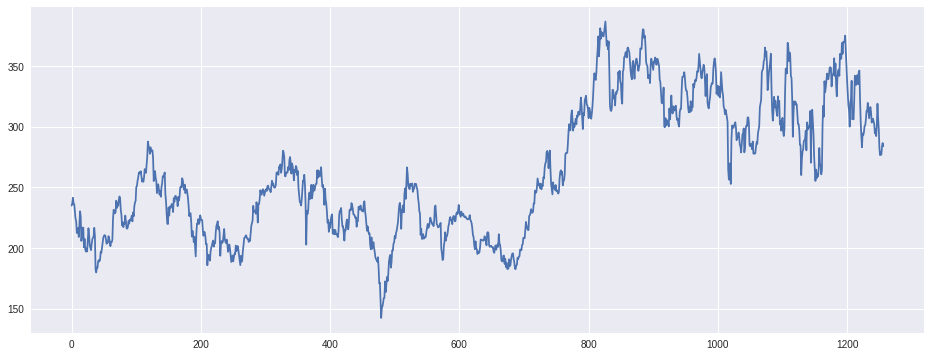

In [0]:
data['open'].plot(figsize=(16,6))

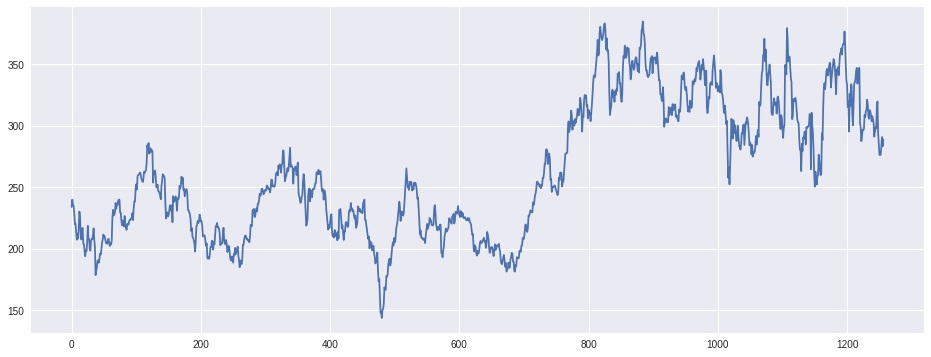

In [0]:
data['close'].plot(figsize=(16,6))

In [0]:
# returns 
data['returns'] = data['close'].pct_change()
#data['log_return'] = np.log(1 + data)
data.head()

,date,open,high,low,close,volume,returns
0,2014-03-17,234.95,237.93,230.50,233.98,5912592,NaN
1,2014-03-18,236.95,241.50,235.02,240.04,6242349,0.025900
2,2014-03-19,241.39,241.55,233.51,235.84,5071327,-0.017497
3,2014-03-20,236.16,239.25,233.36,234.91,3817905,-0.003943
4,2014-03-21,236.02,236.20,227.50,228.89,8227311,-0.025627


In [0]:
# log returns
#def f(x):
#  return np.log(x) - np.log(x.shift(1))
data['log_returns'] = np.log(data['close']).diff()

#data['log_returns'] = data['close'].apply(lambda x: np.log(x) - np.log(x.shift(1)))
data.head()

,date,open,high,low,close,volume,returns,log_returns
0,2014-03-17,234.95,237.93,230.50,233.98,5912592,NaN,NaN
1,2014-03-18,236.95,241.50,235.02,240.04,6242349,0.025900,0.025570
2,2014-03-19,241.39,241.55,233.51,235.84,5071327,-0.017497,-0.017652
3,2014-03-20,236.16,239.25,233.36,234.91,3817905,-0.003943,-0.003951
4,2014-03-21,236.02,236.20,227.50,228.89,8227311,-0.025627,-0.025961


In [0]:
data1 = data.drop(data.index[0])
data1.shape

(1256, 8)

In [0]:
#data.to_csv("/content/drive/My Drive/Colab Notebooks/stock-tickers/TLSA-Returns-010312-030819.csv", index=True)

data1.to_csv("/content/drive/My Drive/Colab Notebooks/stock-tickers/TLSA-Returns-031314-031319.csv", index=False)

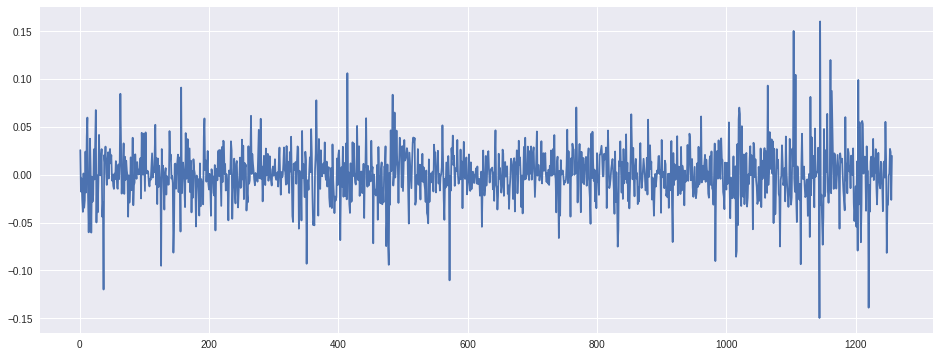

In [0]:
#data['returns'].plot(figsize=(16,6))
data['log_returns'].plot(figsize=(16,6))

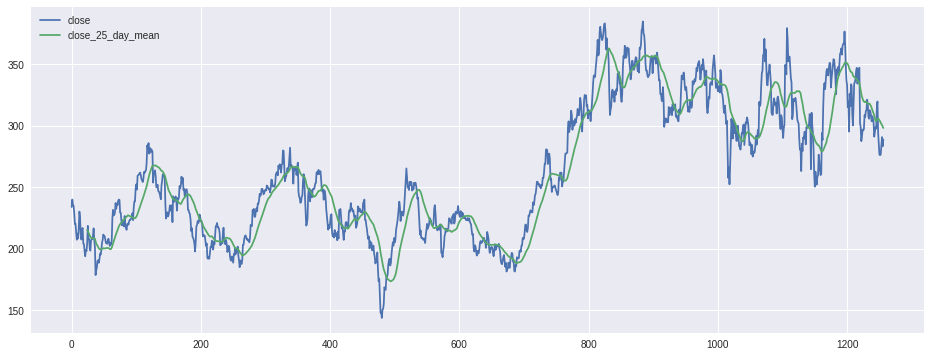

In [0]:
# 25 day rolling average
data['close_25_day_mean'] = data['close'].rolling(window=25).mean()
data[['close','close_25_day_mean']].plot(figsize=(16,6))

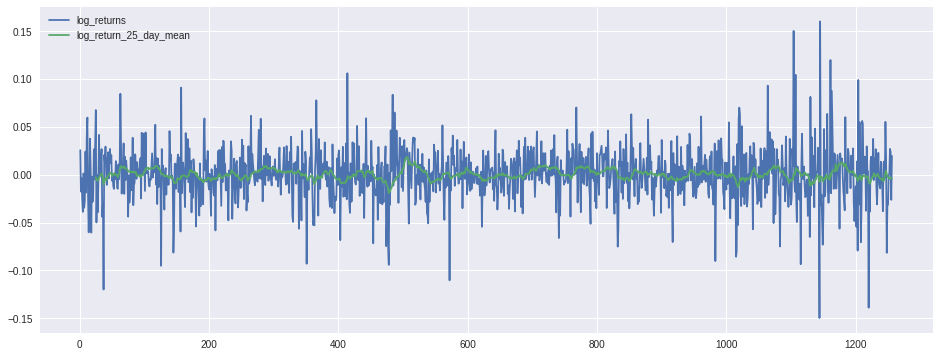

In [0]:
data['log_return_25_day_mean'] = data['log_returns'].rolling(window=25).mean()
data[['log_returns','log_return_25_day_mean']].plot(figsize=(16,6))

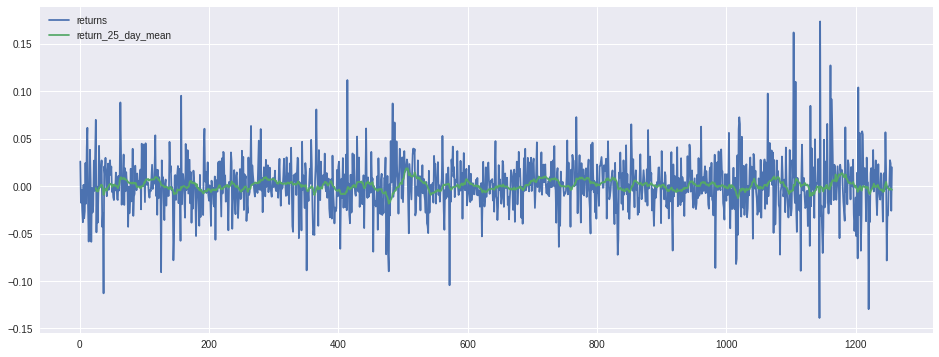

In [0]:
data['return_25_day_mean'] = data['returns'].rolling(window=25).mean()
data[['returns','return_25_day_mean']].plot(figsize=(16,6))

## Subset of Stock Data

* Sentiment Analysis only available 8/20/2018 - 3/13/2019

In [0]:
TSLA_subset_df = data[(data['date'] > '2018-08-20') & (data['date'] <= '2019-03-13')]
TSLA_subset_df.head()


,date,open,high,low,close,volume,returns,log_returns,close_25_day_mean,log_return_25_day_mean,return_25_day_mean
1117,2018-08-21,310.61,324.790,309.00,321.90,13172230,0.043639,0.042714,326.8636,-0.000098,0.001023
1118,2018-08-22,320.87,323.880,314.67,321.64,5945955,-0.000808,-0.000808,326.7752,-0.000274,0.000847
1119,2018-08-23,319.14,327.320,318.10,320.10,5147286,-0.004788,-0.004799,326.7700,-0.000016,0.001103
1120,2018-08-24,320.70,323.850,319.40,322.82,3602564,0.008497,0.008461,327.1396,0.001162,0.002273
1121,2018-08-27,318.00,322.435,308.81,319.27,13079288,-0.010997,-0.011058,327.7824,0.002066,0.003157


In [0]:
TSLA_subset_df.to_csv("/content/drive/My Drive/Colab Notebooks/stock-tickers/v2-TSLA-Returns-Aug18-Mar19.csv", index=False)

In [0]:
TSLA_subset_df['returns_signal'] = np.where(TSLA_subset_df['log_returns'] > 0,1,0)
TSLA_subset_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,volume,returns,log_returns,close_25_day_mean,log_return_25_day_mean,return_25_day_mean,returns_signal
1117,2018-08-21,310.61,324.790,309.00,321.90,13172230,0.043639,0.042714,326.8636,-0.000098,0.001023,1
1118,2018-08-22,320.87,323.880,314.67,321.64,5945955,-0.000808,-0.000808,326.7752,-0.000274,0.000847,0
1119,2018-08-23,319.14,327.320,318.10,320.10,5147286,-0.004788,-0.004799,326.7700,-0.000016,0.001103,0
1120,2018-08-24,320.70,323.850,319.40,322.82,3602564,0.008497,0.008461,327.1396,0.001162,0.002273,1
1121,2018-08-27,318.00,322.435,308.81,319.27,13079288,-0.010997,-0.011058,327.7824,0.002066,0.003157,0


In [0]:
TSLA_subset_df.to_csv("/content/drive/My Drive/Colab Notebooks/stock-tickers/v2-TSLA-Returns-Aug18-Mar19.csv", index=False)

### Visuals

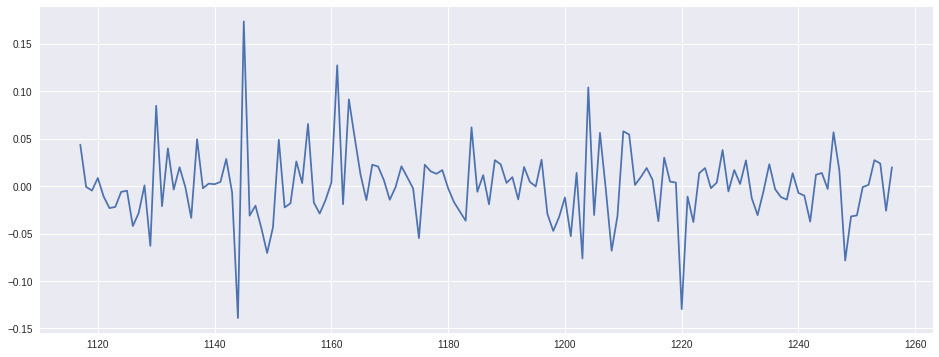

In [0]:
TSLA_subset_df['returns'].plot(figsize=(16,6))

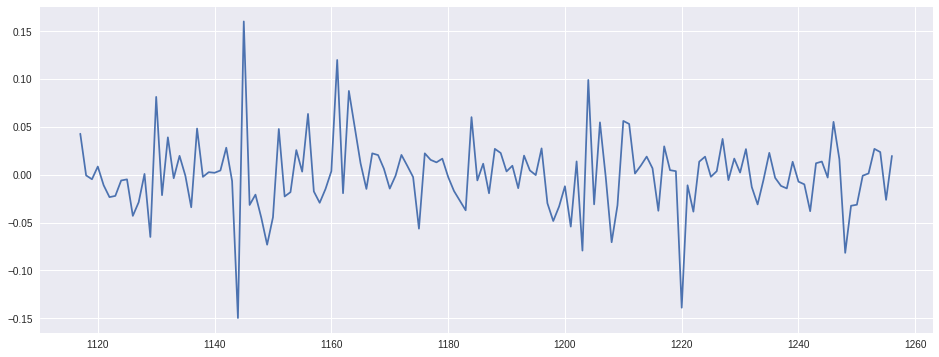

In [0]:
TSLA_subset_df['log_returns'].plot(figsize=(16,6))

## Sentiment Analysis

In [0]:
import nltk
import warnings
#warnings.filterwarnings('ignore')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
busstimes_sentiments = {}

for i in range(1,11):
    page = urlopen('https://www.businesstimes.com.sg/search/tesla?page='+str(i)).read()
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            link_page = urlopen(url).read()
        except:
            url = url[:-2]
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        busstimes_sentiments.setdefault(date, []).append(sentiment)

busstimes_sentiment = {}

for k,v in busstimes_sentiments.items():
    busstimes_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(busstimes_sentiment.keys())

print(busstimes_sentiment)

12 Mar 2019 https://www.businesstimes.com.sg/transport/musk-defends-tesla-tweets-that-us-sec-says-violated-court-order
09 Mar 2019 https://www.businesstimes.com.sg/companies-markets/tesla-secures-us521m-bank-loan-agreement-to-build-china-factory
08 Mar 2019 https://www.businesstimes.com.sg/transport/tesla-gets-us520m-funding-for-first-chinese-plant
08 Mar 2019 https://www.businesstimes.com.sg/transport/tesla-enters-into-agreement-with-chinese-lenders-for-gigafactory
06 Mar 2019 https://www.businesstimes.com.sg/transport/elon-musk-should-be-enabled-to-step-back-from-tesla-investor-says
05 Mar 2019 https://www.businesstimes.com.sg/transport/elon-musk-blindsided-tesla-staff-with-store-closing-plans
02 Mar 2019 https://www.businesstimes.com.sg/energy-commodities/teslas-store-shuttering-strategy-may-pull-the-rug-out-of-solar
01 Mar 2019 https://www.businesstimes.com.sg/transport/teslas-mass-market-us35k-electric-car-ready-to-order-online
27 Feb 2019 https://www.businesstimes.com.sg/transpor

In [0]:
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import pickle

with open('/content/drive/My Drive/Colab Notebooks/stock-tickers/TSLA_busstimes.pickle', 'wb') as handle:
    pickle.dump(busstimes_sentiment, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('filename.pickle', 'rb') as handle:
#    b = pickle.load(handle)

#print a == b

In [0]:
#https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe
s = pd.Series(busstimes_sentiment, name='DateValue')
s.index.name = 'Date'
s.reset_index()
sent_df = pd.DataFrame({'Date':s.index, 'Sentiment':s.values})
sent_df.head()

,Date,Sentiment
0,2018-08-25,-0.943
1,2018-08-26,0.567
2,2018-08-28,0.964
3,2018-09-01,0.980
4,2018-09-02,0.980


In [0]:
sent_df.to_csv("/content/drive/My Drive/Colab Notebooks/stock-tickers/TSLA_sentiment.csv", index=False)

## SEC Filings

In [0]:
import urllib, os, urllib.request
from bs4 import BeautifulSoup as BeautifulSoup
import pandas as pd

In [0]:
# Step 1: Define funtions to download filings
def get_list(ticker):

    base_url_part1 = "http://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK="
    base_url_part2 = "&type=&dateb=&owner=&start="
    base_url_part3 = "&count=100&output=xml"
    href = []
    
    for page_number in range(0,2000,100):
    
        base_url = base_url_part1 + ticker + base_url_part2 + str(page_number) + base_url_part3
        
        sec_page = urllib.request.urlopen(base_url)
        sec_soup = BeautifulSoup(sec_page)
        
        filings = sec_soup.findAll('filing')
        
        for filing in filings:
            report_year = int(filing.datefiled.get_text()[0:4])
            if (filing.type.get_text() == "10-K") & (report_year == 2019):
                print(filing.filinghref.get_text())
                href.append(filing.filinghref.get_text())
    
    return href

def download_report(url_list,dir_path):
    
    target_base_url = 'http://www.sec.gov'
    
    # type = 'EX-101.INS'
    target_file_type = u'EX-101.INS'
    
    for report_url in url_list:
        report_page = urllib.request.urlopen(report_url)
        report_soup = BeautifulSoup(report_page)
        
        xbrl_file = report_soup.findAll('tr')
        
        for item in xbrl_file:
            try:
                if item.findAll('td')[3].get_text() == target_file_type:
                    if not os.path.exists(dir_path):
                        os.makedirs(dir_path)
                             
                    target_url = target_base_url + item.findAll('td')[2].find('a')['href']
                    print("Target URL found!")
                    print("Target URL is:", target_url)
                    
                    file_name = target_url.split('/')[-1]
                    print(file_name)
                   
                    xbrl_report = urllib.request.urlopen(target_url)
                    output = open(os.path.join(dir_path,file_name),'wb')
                    output.write(xbrl_report.read())
                    output.close()
                    
            except:
                pass

# Step 2: Define funtions to download filings
# Import tickers
#TickerFile = pd.read_csv("companylist.csv")
#Tickers = TickerFile['Symbol'].tolist()

#tickers = Tickers

#for ticker in tickers:
#    url_list= get_list(ticker)
#    base_path = "./Downloaded_Filings"
#    dir_path = base_path + "/"+ticker
#    download_report(url_list,dir_path)

## Model 1: Just Closing Price


### Data Prep

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/


In [0]:
from pandas import Series
series = data.ix[:,0]
type(series)

pandas.core.series.Series

In [0]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1259
Training Observations: 830
Testing Observations: 429


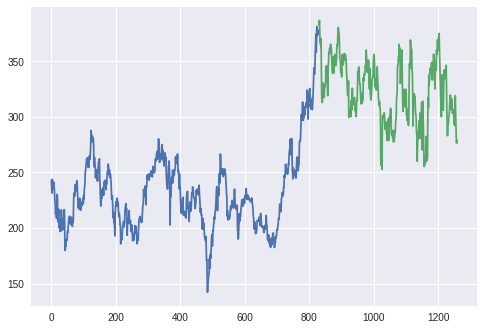

In [0]:
from matplotlib import pyplot
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

In [0]:
n_samples = 1259
n_splits = 3

training_size = i * n_samples / (n_splits + 1) + n_samples % (n_splits + 1)
test_size = n_samples / (n_splits + 1)

Observations: 631
Training Observations: 317
Testing Observations: 314
Observations: 945
Training Observations: 631
Testing Observations: 314
Observations: 1259
Training Observations: 945
Testing Observations: 314


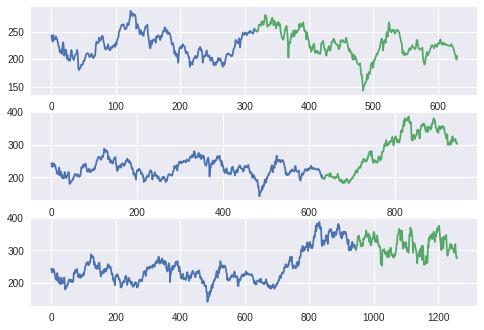

In [0]:
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()